# Kohonen self organizing map (SOM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Training data of 24 color

In [2]:
# generate training data of 24 shades of colors

colors = np.array([[139,0,0],[255,99,71],[255,0,0],[255,127,80],[34,139,34],[143,188,143],[0,128,0],[124,252,0],
         [70,130,180],[0,0,128],[65,105,225],[135,206,235],[255,215,0],[255,255,0],[255,140,0],[238,232,170],[0,128,128],
         [47,79,79],[0,139,139],[224,255,255],[255,105,180],[255,20,147],[218,112,214],[219,112,147]])

color_names = ['dark red', 'tomato', 'red', 'coral','forest green','dark sea green','green','lawn green'
         'steel blue', 'navy', 'royal blue', 'sky blue','gold','yellow','dark orange','pale golden rod'
         'teal', 'dark slate gray', 'dark cyan', 'light cyan','hot pink', 'deep pink', 'orchid','pale violet red']



### Normalizing the color data

Normalizing the color code to value between 0 to 1 instead of 0 to 255.

In [3]:
# normalize to [0,1]

colors = colors/255

### Forming grid

Output array with dimensions 10000*2.

In [4]:
map_size = 100

In [5]:
# initialize 100*100 output grid

grid = np.zeros((map_size*map_size,2))
k = 0

for i in range(map_size):
    for j in range(map_size):
        grid[k,:] = [i,j]
        k = k+1

## Calculating Distance 

In [6]:
# define function to calculate the euclidean distance

def distance(x, weights):
    return np.linalg.norm(x-weights, axis=-1)

## Finding winner nodes

In [7]:
# define functions to find the winner and update weights for winners and their neighbourhood

def get_winner(x,weights):
    dist = distance(x,weights) 
    winner_index = dist.argmin()
    return winner_index

def update_weights(learning_rate,sigma,x,weights):
    winner_index = get_winner(x,weights)   
    d1 = np.floor(winner_index/map_size)
    d2 = np.mod(winner_index,map_size)
    dist = distance(np.array([d1, d2]), grid)
    h = np.exp(-1*(dist**2)/(2 * sigma**2)).reshape(-1,1)
    weights = weights + learning_rate * h * (x - weights)   
    return weights

## Defining learning rate

In [8]:
# define functions following the learning rate and sigma changing rules

def learning_rate_decay(k,T,lr_0):
    return lr_0* np.exp(-k/T)

def sigma_decay(k,T,sigma_0):
    return sigma_0*np.exp(-k/T)

## Initailize weight vectors

We have 10000 rows because the color is mapped over 100 by 100 grid of neurones, and we have three coulmn for value of RGB. Thus, the dimension of weight vector is (10000,3).

In [9]:
# defining weights array

weights = np.empty([map_size*map_size,3]) 

(10000, 3)


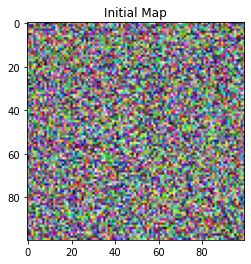

In [10]:
# randomly initialized weights

for i in range(0,map_size*map_size):
    weights[i][0] = np.random.randint(0,256)/255
    weights[i][1] = np.random.randint(0,256)/255
    weights[i][2] = np.random.randint(0,256)/255

print(weights.shape)
plt.title("Initial Map")
plt.imshow(weights.reshape(map_size,map_size,3))
plt.show()

## Function for different Sigma value

In [11]:
def som_sigma(sigma, weights,T,lr):
    for n in range(0,T):
        for i in range(0,24):
            weights = update_weights(lr,sigma,colors[i],weights)
        lr = learning_rate_decay(n,T,lr)
        sigma = sigma_decay(n,T,sigma)
    
        if(n==19):
            w_20 = weights.copy()
        if(n==39):
            w_40 = weights.copy()
        if(n==99):
            w_100 = weights.copy()
        if(n==999):
            w_1000 = weights.copy()
  
    return w_20, w_40, w_100, w_1000


## Function to plot different sigma-epoch

In [12]:
def plot_epochs(w_20, w_40, w_100, w_1000):
    w_20 = w_20.reshape(100,100,3)
    w_40 = w_40.reshape(100,100,3)
    w_100 = w_100.reshape(100,100,3)
    w_1000 = w_1000.reshape(100,100,3)

    plt.figure(figsize=(7, 7))

    plt.subplot(221)
    plt.title('epoch=20')
    plt.imshow(w_20)

    plt.subplot(222)
    plt.title('epoch=40')
    plt.imshow(w_40)

    plt.subplot(223)
    plt.title('epoch=100')
    plt.imshow(w_100)

    plt.subplot(224)
    plt.title('epoch=1000')
    plt.imshow(w_1000)

### For Sigma with value 1

In [13]:
sigma_1 = 1
weights_1 = weights
T_1 = 1000 # Epochs
lr_1 = 0.8 # Learning rate

w_20_1, w_40_1, w_100_1, w_1000_1 = som_sigma(sigma_1, weights_1, T_1, lr_1)

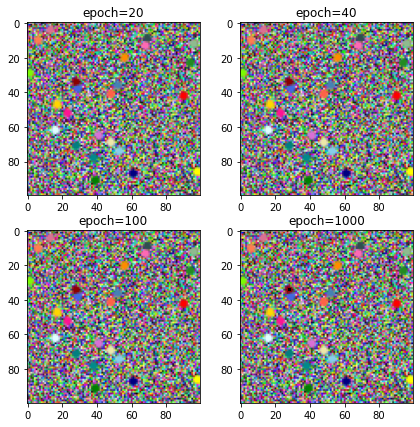

In [14]:
# Plot
plot_epochs(w_20_1, w_40_1, w_100_1, w_1000_1)

### For Sigma 10

In [15]:
sigma_10 = 10
weights_10 = weights
T_10 = 1000 # Epochs
lr_10 = 0.8 # Learning rate

w_20_10, w_40_10, w_100_10, w_1000_10 = som_sigma(sigma_10, weights_10, T_10, lr_10)

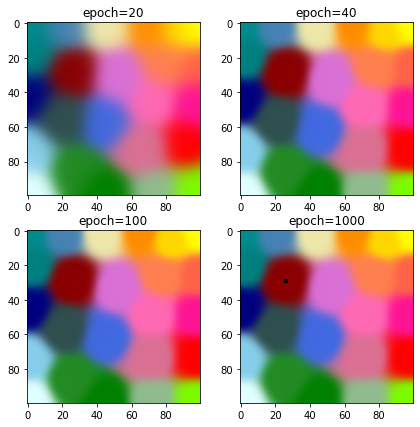

In [16]:
# Plot
plot_epochs(w_20_10, w_40_10, w_100_10, w_1000_10)

### For Sigma 30

In [17]:
sigma_30 = 30
weights_30 = weights
T_30 = 1000 # Epochs
lr_30 = 0.8 # Learning rate

w_20_30, w_40_30, w_100_30, w_1000_30 = som_sigma(sigma_30, weights_30, T_30, lr_30)

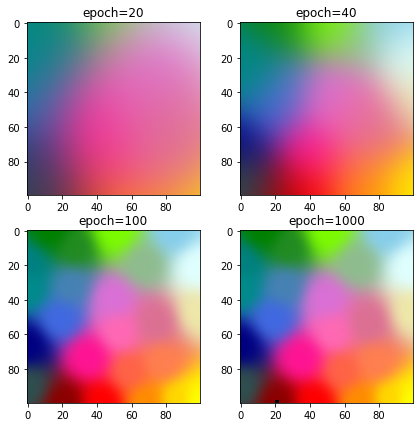

In [18]:
# Plot
plot_epochs(w_20_30, w_40_30, w_100_30, w_1000_30)

### For Sigma 50

In [19]:
sigma_50 = 50
weights_50 = weights
T_50 = 1000 # Epochs
lr_50 = 0.8 # Learning rate

w_20_50, w_40_50, w_100_50, w_1000_50 = som_sigma(sigma_50, weights_50, T_50, lr_50)

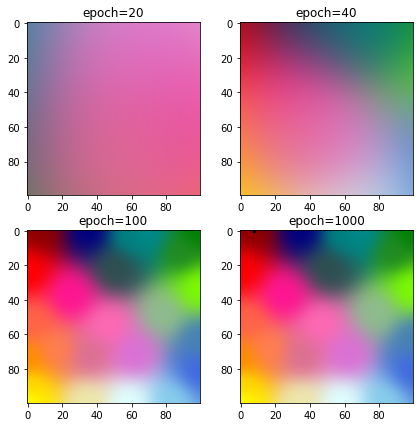

In [20]:
# Plot
plot_epochs(w_20_50, w_40_50, w_100_50, w_1000_50)

### For Sigma 70 

In [21]:
sigma_70 = 70
weights_70 = weights
T_70 = 1000 # Epochs
lr_70 = 0.8 # Learning rate

w_20_70, w_40_70, w_100_70, w_1000_70 = som_sigma(sigma_70, weights_70, T_70, lr_70)

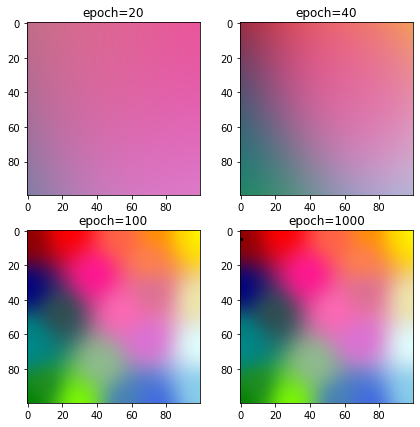

In [22]:
# Plot
plot_epochs(w_20_70, w_40_70, w_100_70, w_1000_70)

## To test with different sigma

Please call function som_sigma() with sigma-value, weights, Number of epochs, and learning rate of your choice. Uncomment code below.

In [ ]:
sigma_x = x # Replace sigma value x here
weights_x = weights
T_x = 1000 # Epochs
lr_x = 0.8 # Learning rate

w_20_x, w_40_x, w_100_x, w_1000_x = som_sigma(sigma_x, weights_x, T_x, lr_x)
plot_epochs( w_20_x, w_40_x, w_100_x, w_1000_x)

**Self Organizing Map (SOM)** uses competitive learning to learn rather than loss calcualtion. In this technique, the weights of neurons close to winning neuron are updated. The winning neuron is the neuron which is most similar to the provided input. After traning the data over number of iterations, the model will be able to group the similar input togeather.

## Conclusion

1. When the sigma value is small, the model will update weights of only few neighourhood neurons and so more numbers of small clusters are formed, we can observe that for small epoch values, the size of cluster are almost similar to the initialized weights and there is a very small change in cluster size with increase in epoch value.
 
2. It can be observed that with increase in sigma value the weights of more number of neuron around winning neuron are updated, thus the clusters will be overlapped and color will appear to be mixed.
 
3. When sigma value is not too high for proper overlapping of clusters and not too small to indicate distinct cluters of color like for sigma value 10, you can observe few distinct color in the output.
 
4. It can be observed that as the number of epoch increases, the model imporves in grouping the same colors together along with slight increase in the size of clusters. Also, colors become more clear with more epochs.